In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
from utils_all import *
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Cleaning 3: multi-events, frequent domain and outliers

#### In this notebook we will do the following things: 
* Basic description of the dataset
* Replace outliers with NaN based on IQR range
* Remove multi-events pages
* Clean those pages were a domain is too frequent 

In [2]:
%store -r DATA_NUM

In [3]:
data = DATA_NUM

### Describe dataset

In [4]:
data.shape

(290074, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290074 entries, 1 to 1597709
Data columns (total 21 columns):
url             290074 non-null object
meta_name       290074 non-null object
text            290074 non-null object
x_coords        290074 non-null float64
y_coords        290074 non-null float64
block_height    290074 non-null float64
block_width     290074 non-null float64
tag             290074 non-null int64
num_siblings    290074 non-null float64
color_r         290074 non-null float64
color_g         290074 non-null float64
color_b         290074 non-null float64
font_size       290074 non-null float64
display         290074 non-null int64
font_weight     290074 non-null int64
width           290074 non-null float64
height          290074 non-null float64
font_family     290074 non-null int64
text_align      290074 non-null int64
line_height     290074 non-null float64
locale          290074 non-null object
dtypes: float64(12), int64(5), object(4)
memory usage: 48.7+ M

We clearly see outliers for X, Y, block height and width, num_siblings, width, height, we need to deal with them 

In [6]:
desc = data.describe()

In [7]:
desc

,x_coords,y_coords,block_height,block_width,tag,num_siblings,color_r,color_g,color_b,font_size,display,font_weight,width,height,font_family,text_align,line_height
count,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000,290074.000000
mean,161.534243,4533.679782,43.887501,208.869995,18.458635,3.040993,71.414270,77.851948,84.278332,15.211796,3.894072,460.221530,101.508672,25.039244,906.595434,5.694292,17.121171
std,469.596994,9088.113864,103.728598,149.291311,10.847205,4.051630,75.405601,72.642047,78.043212,4.731340,1.130860,131.869694,168.144926,116.345222,467.451537,1.335081,9.603470
min,-119988.000000,-99989.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,25.000000,670.000000,16.000000,92.000000,7.000000,1.000000,4.000000,10.000000,17.000000,13.000000,3.000000,400.000000,-1.000000,-1.000000,550.000000,5.000000,15.000000
50%,79.000000,1798.000000,22.000000,172.000000,26.000000,2.000000,51.000000,51.000000,59.000000,14.000000,4.000000,400.000000,-1.000000,-1.000000,1079.000000,5.000000,20.000000
75%,220.000000,4202.000000,36.000000,312.000000,26.000000,4.000000,102.000000,115.000000,129.000000,16.000000,4.000000,400.000000,174.128906,21.000000,1231.000000,7.000000,22.000000
max,14972.000000,422496.000000,8318.000000,2831.000000,35.000000,136.000000,255.000000,255.000000,255.000000,112.000000,13.000000,900.000000,1376.000000,27000.000000,1786.000000,7.000000,150.000000


{'boxes': [<matplotlib.lines.Line2D at 0x11a90eb00>,
 'caps': [<matplotlib.lines.Line2D at 0x11a91be10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a92ddd8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a928e80>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11a90e668>,
  <matplotlib.lines.Line2D at 0x11a934f28>]}

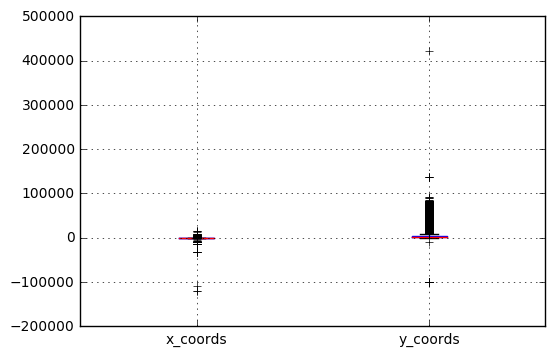

In [8]:
data[['x_coords', 'y_coords']].boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x10de60320>,
 'caps': [<matplotlib.lines.Line2D at 0x10de68d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x10de6eef0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10de6e6d8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10de60cf8>,
  <matplotlib.lines.Line2D at 0x10de7ae80>]}

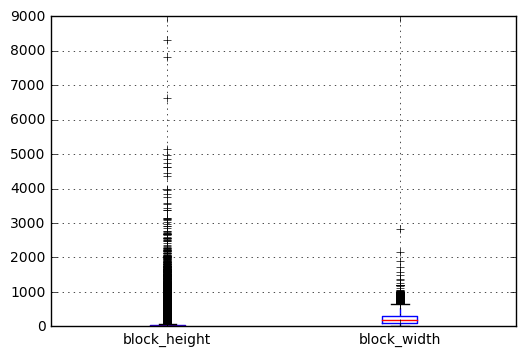

In [9]:
data[['block_height', 'block_width']].boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x10e2e9940>,
 'caps': [<matplotlib.lines.Line2D at 0x10e2f3c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x10e2fcc50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10e2f6cf8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10e2e9ac8>,
  <matplotlib.lines.Line2D at 0x10e302da0>]}

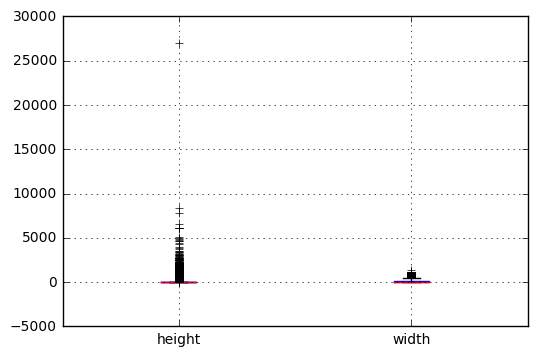

In [10]:
data[['height', 'width']].boxplot()

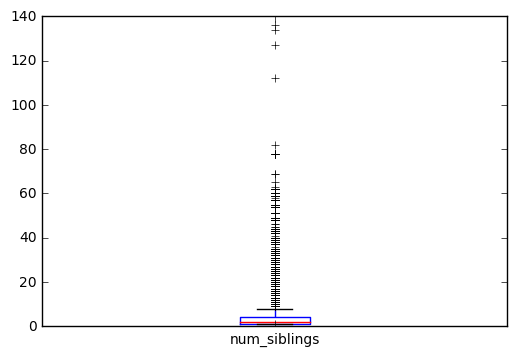

In [11]:
data.num_siblings.plot('box')

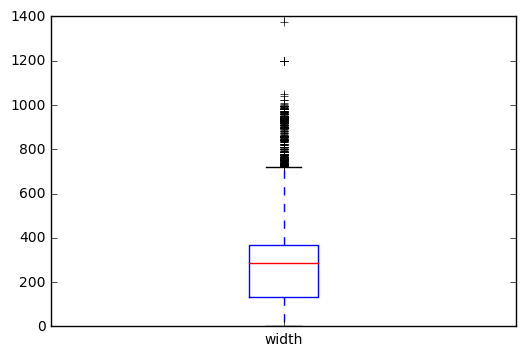

In [12]:
data.width[data.width != -1].plot('box')

## Remove multi events pages

In [13]:
df = data[data.meta_name != 'not_event_element']

In [14]:
urls = df.url.unique()
f = open('event_urls.txt', 'w')
for url in urls:
    f.write(url + '\n')

In [15]:
df.shape

(154409, 21)

Number of unique urls

In [16]:
len(df.url.unique())

99975

In [17]:
df_name = df[df.meta_name == 'name']

Collect info about 'name' of event per URL

In [18]:
names_unique = df_name.url.value_counts().reset_index()
names_unique.columns = ['url', 'count_names']

In [19]:
names_unique.head()

,url,count_names
0,http://www.kokodatrail.com.au/forums/index.php...,22
1,http://www.kokodatrail.com.au/forums/index.php...,20
2,http://www.kokodatrail.com.au/forums/index.php...,20
3,http://www.kokodatrail.com.au/forums/index.php...,20
4,http://www.kokodatrail.com.au/forums/index.php...,18


In [20]:
names_unique.iloc[100,0]

'http://www.fitchburgwi.gov/Calendar.aspx?EID=3119'

We see that sometimes we have below 25 events per page, we need to remove it.§

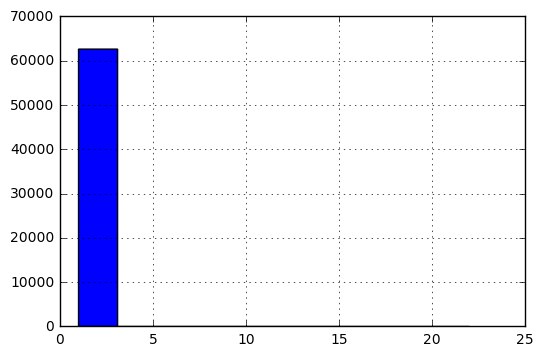

In [21]:
names_unique.count_names.hist()

99% of all pages has one event

In [22]:
len(names_unique[names_unique.count_names == 1])/ len(names_unique.count_names)

0.9918927545483562

Let's collect UTLs with more than 1 event

In [23]:
urls_1 = names_unique[names_unique.count_names == 1].url

In [24]:
df['one_event'] = df.url.isin(urls_1)

df contains info about all fields, not only names, that's why we lost more than 1% of data

In [25]:
df.shape

(154409, 22)

In [26]:
df.one_event.sum()

106008

In [27]:
df_1 = df[df.one_event]

No we have datasets of event components where one event was there

In [28]:
df_1.shape

(106008, 22)

## Events per domain

Number of originally unique urls

In [29]:
df.url.unique().size

99975

Number of filtered urls with one event

In [30]:
df_1.url.unique().size

62152

Function which returns domain per url

In [31]:
def get_domain(url):
    parts = url.split('//', 1)
    return parts[1].split('/', 1)[0].replace('www.','')

In [32]:
df['domain'] = df.url.apply(get_domain)
df_1['domain'] = df_1.url.apply(get_domain)

Number of unique domains for original datasets

In [33]:
df.domain.unique().size

4409

Number of unique domains for urls with one event

In [34]:
df_1.domain.unique().size

3865

That means there are around 16 pages per one domain.

In [35]:
df_1.url.unique().size/df_1.domain.unique().size

16.080724450194047

In [36]:
df_1_dom_count = df_1.domain.value_counts().reset_index()
df_1_dom_count.columns = ['domain', 'count_domain']

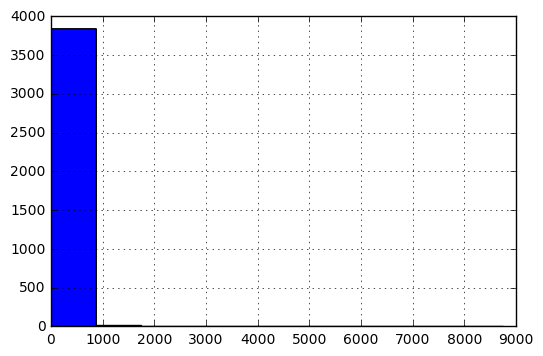

In [37]:
df_1_dom_count.count_domain.hist()

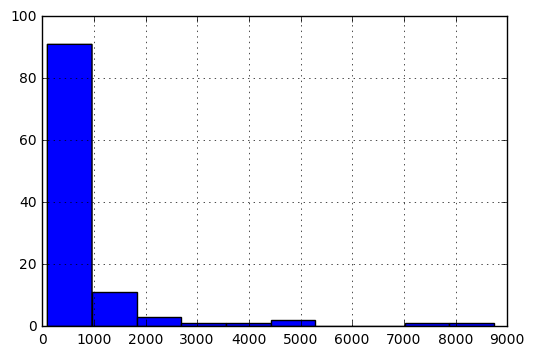

In [38]:
df_1_dom_count.count_domain[df_1_dom_count.count_domain >= 100].hist()

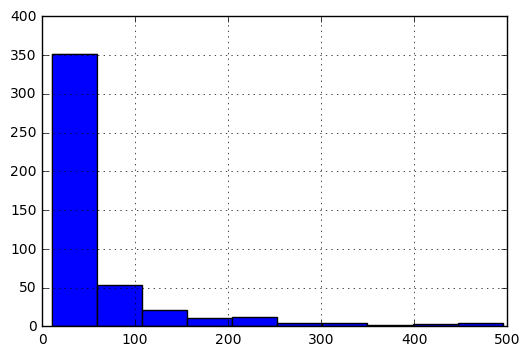

In [39]:
df_1_dom_count.count_domain[df_1_dom_count.count_domain > 10][df_1_dom_count.count_domain < 500].hist()

We will set the limit for thouse domains that have more than 100 pages

In [40]:
df_1_dom_count.count_domain[df_1_dom_count.count_domain > 100] = 100

In [41]:
df_1_dom_count.count_domain.sum()

32212

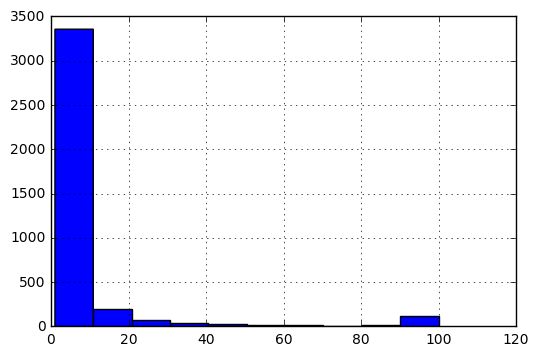

In [42]:
df_1_dom_count.count_domain.hist()

In [43]:
# return the number of domain with the cut
def get_df_dom_count(df_1):
    df_1_dom_count = df_1.domain.value_counts().reset_index()
    df_1_dom_count.columns = ['domain', 'count_domain']
    df_1_dom_count.count_domain[df_1_dom_count.count_domain > 100] = 100
    return df_1_dom_count

In [44]:
df_1_dom_count = get_df_dom_count(df_1)

In [45]:
df_1_dom_count.head()

,domain,count_domain
0,yardsales.net,100
1,bucuresteni.ro,100
2,hooversun.com,100
3,productpilot.com,100
4,ticketbis.com,100


### Remove URLs of those domains which are too frequent

Some domains as we see are too frequent. Here we remove those pages

In [46]:
df_1_dom_count_100 = df_1_dom_count.domain[df_1_dom_count.count_domain == 100]

def is_kept(s):
    global df_1_dom_count_100
    c = df_1_dom_count.count_domain[df_1_dom_count.domain == s].values[0]
    if c != 0:
        df_1_dom_count.count_domain[df_1_dom_count.domain == s] = c - 1
        return 1
    else:
        return 0

We separatr df_1 into two parts: with domains which have less than 100 pages and 100. First part we will keep without changes. Second part we will cut.

In [47]:
df_1_dom_count_100.shape

(111,)

In [48]:
df_1_100 = df_1[df_1.domain.isin(df_1_dom_count_100)]
df_1_not_100 = df_1[~df_1.domain.isin(df_1_dom_count_100)]

df_1_100.shape, df_1_not_100.shape

((84896, 23), (21112, 23))

We will keep or not to keep certain domain depending on how many times it already appeared.

In [ ]:
# WARNING: time-consuming procedure, we keep the globabl variable df_1_dom_count 
# and stop when there is a limit for this particular domain

df_1_100['keep'] = df_1_100.domain.apply(is_kept)
df_1_not_100['keep'] = 1

In [ ]:
df_1_all = pd.concat(axis=0, objs=[df_1_100, df_1_not_100])

In [ ]:
df_1_final = df_1_all[df_1_all['keep'] == 1]

In [ ]:
df_1_final.head()

In [ ]:
df_1_final.shape

In [ ]:
df_1.shape

In [ ]:
df_1_final = df_1_final.drop(['one_event', 'domain', 'keep'], axis=1)

Properties of the df_1_final dataset:
  * It is cleaned (without zero - x, y, width, heigt vlues, without meta tags)
  * It containes at most 100 different urls for one domain
  * Every page contains only 1 event, the rest is removed
  * Doesn't contain duplicates by numeric features

In [ ]:
data.shape

We will keep event components and random elements in a differnet sets and clean them independently

### Outliers subset of Event components

In [ ]:
cols = [col for col in df_1_final.columns if col not in ['num_siblings', 'x_coords', 'y_coords', 'height', 'width', 'block_height', 'block_width']]
# first dataset, we won't change it
data_out_text = df_1_final[cols]

# in these two datasets we will look outliers
data_out1 = df_1_final[['num_siblings', 'x_coords', 'y_coords', 'block_height', 'block_width']]
data_out2 = df_1_final[['height', 'width']]

In [ ]:
data_out1.describe()

Here a lot of "-1" which we added, so we will ignore them 

In [ ]:
data_out2.describe()

Remove negative numbers

In [ ]:
data_out1[data_out1 < 0] = np.nan

In [ ]:
data_out1.isnull().sum()

In here -1 means auto, so it's ok

In [ ]:
data_out2[data_out2 < -1] = np.nan

In [ ]:
data_out2.isnull().sum()

In [ ]:
data_out1.describe()

In [ ]:
data_out2.describe()

Let's write a function which set NaN for outiers, we will use IQR range. 

In [ ]:
def outliers_to_nan(series):
    series_sorted = series.sort_values()
    series_sorted = series_sorted.dropna()
    Q1 = series_sorted.quantile(0.10)
    Q3 = series_sorted.quantile(0.90)
    IQR = Q3 - Q1
    series[series >= Q3 + 1.5 * IQR] = np.nan
    series[series <= Q1 - 1.5 * IQR] = np.nan
    return series

In [ ]:
data_out1_cl = data_out1.apply(outliers_to_nan)
data_out1_cl.isnull().sum()

In [ ]:
data_out1_cl.describe()

In [ ]:
data_out_22 = data_out2

In [ ]:
data_out2_without_auto = data_out2

We keep indecies to put them later

In [ ]:
idx_auto_width = data_out2.width == -1
idx_auto_height = data_out2.height == -1

In [ ]:
data_out2_without_auto[data_out2_without_auto == -1] = np.nan

In [ ]:
data_out2_cl = data_out2_without_auto.apply(outliers_to_nan)
data_out2_cl.isnull().sum()

In [ ]:
data_out2_cl.ix[idx_auto_width, 'width'] = -1
data_out2_cl.ix[idx_auto_height, 'height'] = -1

In [ ]:
data_out2_cl.isnull().sum()

At this point we consider subset of Event components and:

* data_out1_cl - sub dataset of ['num_siblings', 'x_coords', 'y_coords', 'block_height', 'block_width'] where NaN is outlier
* data_out2_cl - sub dataset of ['height', 'width'] where NaN is outlier

Less than 500 outliers in every column

In [ ]:
data_event_clean = pd.concat([data_out_text, data_out1_cl, data_out2_cl], axis=1)

In [ ]:
data_event_clean.head()

In [ ]:
data_event_clean.shape

In [ ]:
data_event_clean.describe()

### Outliers subset of random web elements

In [ ]:
df_not_event = data[data.meta_name == 'not_event_element']

In [ ]:
df_not_event_num.describe()

In [ ]:
# prepare data for outliers
cols = [col for col in df_not_event.columns if col not in ['num_siblings', 'x_coords', 'y_coords', 'height', 'width', 'block_height', 'block_width']]
# first dataset, we won't change it
data_out_text = df_not_event[cols]

data_out1 = df_not_event[['num_siblings', 'x_coords', 'y_coords', 'block_height', 'block_width']]
data_out2 = df_not_event[['height', 'width']]

# fill negative values
data_out1[data_out1 < 0] = np.nan
data_out2[data_out2 < -1] = np.nan

# remove outliers for the first set
data_out1_cl = data_out1.apply(outliers_to_nan)

# keep -1 for auto in these CSS proeprties
data_out2_without_auto = data_out2
idx_auto_width = data_out2.width == -1
idx_auto_height = data_out2.height == -1

# remove outliers for the second set
data_out2_without_auto[data_out2_without_auto == -1] = np.nan
data_out2_cl = data_out2_without_auto.apply(outliers_to_nan)

# fill those NaN with -1 again with -1
data_out2_cl.ix[idx_auto_width, 'width'] = -1
data_out2_cl.ix[idx_auto_height, 'height'] = -1

In [ ]:
data_out1_cl.isnull().sum()

In [ ]:
data_out2_cl.isnull().sum()

At this point we consider subset of All elements from a page and:

* data_out1_cl - sub dataset of ['num_siblings', 'x_coords', 'y_coords', 'block_height', 'block_width'] where NaN is outlier
* data_out2_cl - sub dataset of ['height', 'width'] where NaN is outlier

Less than 500 outliers in every column

In [ ]:
data_all_clean = pd.concat([data_out_text, data_out1_cl, data_out2_cl], axis=1)

In [ ]:
data_all_clean.shape

In [ ]:
data_all_clean.head()

In [ ]:
data_all_clean.describe()

We will do the same operations for this set. 

### Combine data  from Event component and All elemetns

In [ ]:
data_event_clean.shape

In [ ]:
data_all_clean.shape

In [ ]:
data_clean_with_nan = pd.concat([data_event_clean, data_all_clean])

In [ ]:
data_clean_with_nan.shape

In [ ]:
data_clean_with_nan.head()

In [ ]:
data_clean_with_nan.describe()

In [ ]:
DATA_NUM_CL_WITH_NAN = data_clean_with_nan

In [ ]:
%store DATA_NUM_CL_WITH_NAN

In [ ]:
DATA_NUM_CL_WITH_NAN.shape

Properties of DATA_NUM_CL_WITH_NAN:
* all numerical features are numeric
* NaN in the place of outliers for futher processing
* Page with single event
* Pages from frequent domains are removed

In [ ]:
import h5py
DATA_NUM_CL_WITH_NAN.to_hdf('store.h5', 'DATA_NUM_CL_WITH_NAN')